In [3]:
import numpy as np

def covariance(ls_x, ls_y):
    summation = 0
    for i in range(len(ls_x)):
        x_factor = (ls_x[i] - np.mean(ls_x))

        y_factor = (ls_y[i] - np.mean(ls_y))
        
        summation += x_factor * y_factor
    
    return (1/len(ls_x) - 1) * summation 

covariance(np.array(range(4)), np.array([1, 1, 2, 3]))

-2.625

In [4]:
# Matrix multiplication in numpy

import numpy as np

A = np.array([[2, 0], [1, 5]])
v = np.array([3, 4])

print(np.dot(A, v))

[ 6 23]


In [5]:
np.dot(v, A)

array([10, 20])

In [6]:
eig_value, eig_vector = np.linalg.eig(A)

In [14]:
print(eig_value)  # this tells us that 5 is the eigen value for first column of A, and 2 is same for second column
print('')
print(eig_vector)

[5. 2.]

[[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


In [15]:
# Verify Av = av

print(A * np.array([0, 1]))

[[0 0]
 [0 5]]


In [16]:
eig_value[0]*eig_vector[:, 0]

array([0., 5.])

In [17]:
np.dot(A, eig_vector[:, 1])

array([ 1.8973666 , -0.63245553])

In [21]:

# multiply the other eigen-value of A with its associated eigen-vector
eig_value[1]*eig_vector[:, 1]

array([ 1.8973666 , -0.63245553])

In [22]:
import pandas as pd

df = pd.read_excel('Datasets/pca_uk.xlsx')

In [23]:
df

,England,N Ireland,Scotland,Wales,Features
0,375,135,458,475,Alcoholic drinks
1,57,47,53,73,Beverages
2,245,267,242,227,Carcase meat
3,1472,1494,1462,1582,Cereals
4,105,66,103,103,Cheese
5,54,41,62,64,Confectionery
6,193,209,184,235,Fats and oils
7,147,93,122,160,Fish
8,1102,674,957,1137,Fresh fruit
9,720,1033,566,874,Fresh potatoes


In [38]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)  # data in reduced dimensionality format
# X_r = pca.fit_transform(X.T) # using x in transposed form, so it comes out in columns (among other things)

print(X_r)  # unfortunately, there are no names to be specified for these values
# but the rows do show the 2 value feature for each our four original classes!

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


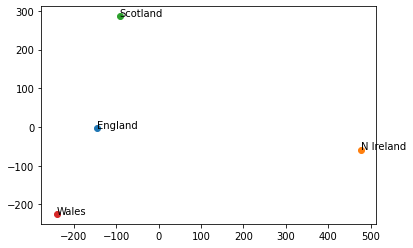

In [39]:

# Lets visualize the principle components - differentiation!!! (but not knowing the name of dimensions)

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

In [41]:
# How much info is preserved by PCA?

# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_) # super useful method!
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())  # over 95% info preserved~ this tells us we have the right number of PC's!

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


In [44]:
# calcualtion the correlation between PC1 other PC
import scipy
print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))  # remember, we WANTED to remove the correlation!

Correlation of PCA Component:
(0.0, 1.0)


In [52]:
'''
def reverse_without_numpy(ls):
    new = n
'''

def reverse_list(ls):
    return ls[::-1]

In [53]:
reverse_list([1, 2, 3])

[3, 2, 1]

In [54]:
# own function to obtain principal components
X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])

In [57]:
def center_matrix(X):
    return np.array([X[:, col_num] - np.mean(X[:, col_num]) for col_num in range(X.shape[1])]).T

def pca(X, n_components=2):
    centered = center_matrix(X)
    eig_val, eig_vec = np.linalg.eig(np.cov(centered))
    sorted_vals = np.argsort(eig_val)[-n_components:][::-1]
    print(sorted_vals)
    print("eig vec", eig_vec[:, sorted_vals])
    print("centered", centered)
    return np.dot(eig_vec[:, sorted_vals].T, centered)

In [58]:
pca(X, n_components=2)

[0 1]
eig vec [[-0.63281645  0.59122191]
 [-0.27179185 -0.71376644]
 [ 0.21093882 -0.19707397]
 [ 0.69366948  0.3196185 ]]
centered [[ 0.   -1.5  -0.75]
 [ 0.   -0.5  -0.75]
 [ 0.    0.5   0.25]
 [ 0.    1.5   1.25]]


array([[ 0.        ,  2.23109423,  1.59827778],
       [ 0.        , -0.14905888,  0.44216303]])

In [60]:
import numpy as np
from sklearn.decomposition import PCA
import scipy

# PCA computation by sklearn

X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])
# print(X)
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

print('Correlation of PCA Component:')
print(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1]))


# Our own function to compare 
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    # center columns by subtracting column means
    C =  M - data
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print(V)
    # eigen decomposition of covariance matrix
    eig_value, eig_vector = np.linalg.eig(V)
    # sort eigenvalue in decreasing order
    idx = np.argsort(eig_value)[::-1] 
    idx_n_comp = idx[:n_comp]
    # eigenvectors according to top n_comp largest
    eig_vector = eig_vector[:, idx_n_comp]
    P = np.dot(C, eig_vector)
    return P


PCA_calculation(X, 2)

[[-1.65392786 -0.2775295 ]
 [-0.84584087  0.31153366]
 [ 0.55130929  0.09250983]
 [ 1.94845944 -0.126514  ]]
[2.5171201  0.06621324]
[0.97436907 0.02563093]
[0.97436907 1.        ]
Correlation of PCA Component:
(3.885780586188048e-16, 0.9999999999999996)
[[0.         0.         0.        ]
 [0.         1.66666667 1.16666667]
 [0.         1.16666667 0.91666667]]


array([[-1.65392786,  0.2775295 ],
       [-0.84584087, -0.31153366],
       [ 0.55130929, -0.09250983],
       [ 1.94845944,  0.126514  ]])

## Activity: Apply Principle to Boston housing features and then train the linear regression model
Basically, we remove correlation among features with PCA

We do not need to do feature data scaling (normalization) when we do PCA for features, because

Report the R-squared and MSE for a system with PCA+Linear Regression

In [100]:
# remove correlation among features in Boaton data - scaling not required
# report the information preserves

from sklearn.datasets import load_boston

In [101]:
# get the data
boston = load_boston()

In [102]:
# getting training data
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
target_var = 'MEDV'
df[target_var] = boston.target
X = df[boston.feature_names]
y = boston.target

In [112]:
# split data into scaled training and test data

def scale_data(data, scaler, target_var):
    """Scales the specified features of the dataset, using the scaler. 
       Returns DataFrame and data needed to make linear regression model.
    """
    # make a DataFrame from the data
    df = pd.DataFrame(data.data)
    df.columns = data.feature_names
    df[target_var] = data.target
    # split the data
    X = df[data.feature_names]
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    # scale the training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return df, X_train_scaled, X_test_scaled, y_train, y_test

# import from sklearn
from sklearn.preprocessing import StandardScaler
# instantiate the scaler object
standard_scaler = StandardScaler()
# make the DataFrame, with scaled training and testing data
standard_df, X_train_scaled, X_test_scaled, y_train, y_test = scale_data(boston, standard_scaler, target_var)

In [113]:
# Apply PCA on X_train
pca = PCA(n_components=9)
X_train_reduced = pca.fit_transform( X_train_scaled)

print(X_train_reduced)

# Obtain required number of principal components
print('But is this the right amount of principle components?')
print(pca.explained_variance_) # super useful method!
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())  

[[-1.25982453 -1.09602895 -1.58686145 ...  0.04533298 -0.77202009
  -0.71635666]
 [-1.87734414 -1.09685975 -0.98053554 ... -0.04967336 -0.06064333
  -0.39181321]
 [-2.51208752  1.4533637   1.775388   ...  0.36686172 -0.54924378
   0.49870808]
 ...
 [ 0.03814707  0.74414144 -0.48979114 ... -0.12583215  0.23420077
  -0.32417165]
 [-0.94925813  0.35576387 -1.41581584 ...  0.73867413 -0.67405691
  -0.46130744]
 [-0.38481242  1.00499051 -1.10244654 ...  0.53857373  0.07246543
  -0.98882986]]
But is this the right amount of principle components?
[6.10157016 1.41936305 1.27643939 0.92442932 0.8158221  0.68438946
 0.54593187 0.38234911 0.28165905]
[0.46811316 0.10889369 0.09792857 0.07092232 0.06258996 0.05250644
 0.04188396 0.02933387 0.02160891]
[0.46811316 0.57700685 0.67493543 0.74585775 0.80844771 0.86095415
 0.9028381  0.93217197 0.95378089]


In [114]:
# Apply data normalization on X_train_reduced
X_train_reduced_scaled = pca.fit_transform(X_train_reduced)

In [115]:
# retrain the model
from sklearn.linear_model import LinearRegression
import time

def time_fitting(fitter):
    '''Record and display the time taken to train the model.'''
    start = time.time()
    fitter()
    end = time.time()
    print(f'Fitting Time: {end-start} miliseconds')

def make_trained_model(X_train, y_train):
    """Return a Linear Regression model fitted to the training data. 
       Prints intercept and coefficients.
       
       Parameters:
       X_train(list): training data for features of dataset
       y_train(list): training data for target value

    """
    model = LinearRegression()
    # fit the model and time it
    time_fitting(lambda: model.fit(X_train, y_train))
    print()
    # print intercept and coefficients
    print(f'Y-intercept of Regression Line: {model.intercept_} \n')
    print(f'Weight values of Regression Line: \n{model.coef_}')
    return model

model = make_trained_model(X_train_reduced_scaled, y_train)

Fitting Time: 0.0006120204925537109 miliseconds

Y-intercept of Regression Line: 22.608707124010557 

Weight values of Regression Line: 
[-2.44698073  2.14477667  3.62563979 -0.28010938 -1.96868334 -0.20433543
 -0.32141186  0.96300333  0.1708308 ]


In [117]:

X_test_reduced = pca.transform(X_test)

ValueError: operands could not be broadcast together with shapes (127,13) (9,) 